<a href="https://colab.research.google.com/github/LucasMeirellesS/CaseClassificacaoDNC/blob/main/CaseClassifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [212]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import numpy as np

In [146]:
def getDummiesLE(df, columns):
  from sklearn.preprocessing import LabelEncoder
  le = LabelEncoder()
  for item in columns:
    le.fit(df[item])
    df[item] = le.fit_transform(df[item])


def getDummiesOHE(df, columns, dop_binary=False):
  from sklearn.preprocessing import OneHotEncoder
  if dop_binary:
    encoder = OneHotEncoder(drop="if_binary")
  else:
    encoder = OneHotEncoder()
  dohe = pd.DataFrame(encoder.fit_transform(df[columns]).toarray(), index= df.index, columns = encoder.get_feature_names_out())
  df.drop(columns, axis = 1, inplace=True)
  dohe = df.join(dohe)
  return dohe

In [147]:
df = pd.read_excel("/content/churn_data.xlsx")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [148]:
df.drop("customerID", axis=1, inplace=True)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [150]:
x = df.drop("Churn", axis=1)
y = df[["Churn"]]
x_cat = x.select_dtypes(exclude="number").columns

In [151]:
x = getDummiesOHE(x, x_cat, dop_binary=True)
x.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,34,56.95,1889.50,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,2,53.85,108.15,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,45,42.30,1840.75,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,2,70.70,151.65,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [152]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(x_scaled, columns=x.columns)

In [153]:
getDummiesLE(y, y.columns)
y

<ipython-input-146-69f16880e4b3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[item] = le.fit_transform(df[item])


,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7027,0
7028,0
7029,0
7030,1


In [154]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, stratify=y)

# Logistic Regression

## Sem Tunning

In [155]:
model = LogisticRegression(multi_class="multinomial")
lr = model.fit(x_treino, y_treino)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [156]:
y_pred_lr1 = lr.predict(x_teste)

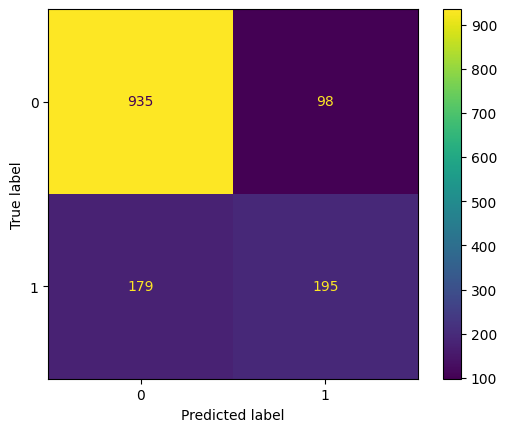

In [157]:
cm = confusion_matrix(y_teste, y_pred_lr1)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [158]:
metricas = {
    'model': ['Logistic Regression', 'Logistic Regression'],
    'modo': ['treino', 'teste'],
    'accuracy': [accuracy_score(y_treino, lr.predict(x_treino)), accuracy_score(y_teste, lr.predict(x_teste))],
    'balanced_accuracy': [balanced_accuracy_score(y_treino, lr.predict(x_treino)), balanced_accuracy_score(y_teste, lr.predict(x_teste))],
    'precision': [precision_score(y_treino, lr.predict(x_treino)), precision_score(y_teste, lr.predict(x_teste))],
    'recall': [recall_score(y_treino, lr.predict(x_treino)), recall_score(y_teste, lr.predict(x_teste))],
    'f1_score': [f1_score(y_treino, lr.predict(x_treino)), f1_score(y_teste, lr.predict(x_teste))],
    'rocauc': [roc_auc_score(y_treino, lr.predict_proba(x_treino)[:,1]), roc_auc_score(y_teste, lr.predict_proba(x_teste)[:,1])]

}

pd.DataFrame(metricas)

,model,modo,accuracy,balanced_accuracy,precision,recall,f1_score,rocauc
0,Logistic Regression,treino,0.805689,0.725563,0.660032,0.554515,0.602690,0.846106
1,Logistic Regression,teste,0.803127,0.713261,0.665529,0.521390,0.584708,0.855807


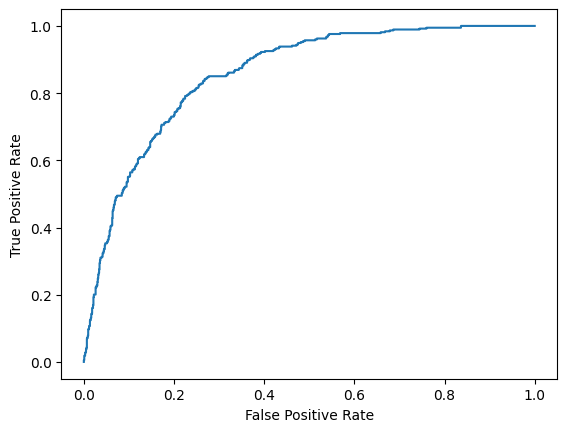

In [159]:
y_score = lr.decision_function(x_teste)

fpr, tpr, _ = roc_curve(y_teste, y_score, pos_label=lr.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

## Com Tunning

In [160]:
parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]



grid_search = GridSearchCV(estimator = LogisticRegression(),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5)


grid_search.fit(x_treino, y_treino)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']},
                         {'penalty': ['none', 'elasticnet', 'l1', 'l2']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100]}],
             scoring='accuracy')

In [161]:
grid_search.best_estimator_.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'none',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [162]:
model2 = LogisticRegression(C= 100,
 class_weight= None,
 dual= False,
 fit_intercept= True,
 intercept_scaling= 1,
 l1_ratio= None,
 max_iter= 100,
 multi_class= 'multinomial',
 n_jobs= None,
 penalty= 'l2',
 random_state= None,
 solver= 'lbfgs',
 tol= 0.0001,
 verbose= 0,
 warm_start= False)

lr2 = model.fit(x_treino, y_treino)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


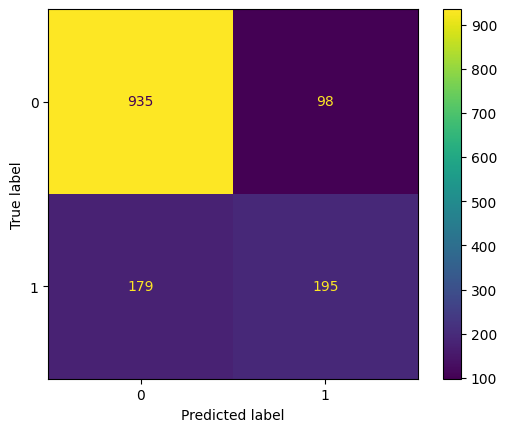

In [163]:
y_pred_lr2 = lr2.predict(x_teste)

cm = confusion_matrix(y_teste, y_pred_lr2)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [164]:
metricas2 = {
    'model': ['Logistic Regression2', 'Logistic Regression2'],
    'modo': ['treino', 'teste'],
    'accuracy': [accuracy_score(y_treino, lr2.predict(x_treino)), accuracy_score(y_teste, lr2.predict(x_teste))],
    'balanced_accuracy': [balanced_accuracy_score(y_treino, lr2.predict(x_treino)), balanced_accuracy_score(y_teste, lr2.predict(x_teste))],
    'precision': [precision_score(y_treino, lr2.predict(x_treino)), precision_score(y_teste, lr2.predict(x_teste))],
    'recall': [recall_score(y_treino, lr2.predict(x_treino)), recall_score(y_teste, lr2.predict(x_teste))],
    'f1_score': [f1_score(y_treino, lr2.predict(x_treino)), f1_score(y_teste, lr2.predict(x_teste))],
    'rocauc': [roc_auc_score(y_treino, lr2.predict_proba(x_treino)[:,1]), roc_auc_score(y_teste, lr2.predict_proba(x_teste)[:,1])]

}

pd.DataFrame(metricas2)

,model,modo,accuracy,balanced_accuracy,precision,recall,f1_score,rocauc
0,Logistic Regression2,treino,0.805689,0.725563,0.660032,0.554515,0.602690,0.846106
1,Logistic Regression2,teste,0.803127,0.713261,0.665529,0.521390,0.584708,0.855807


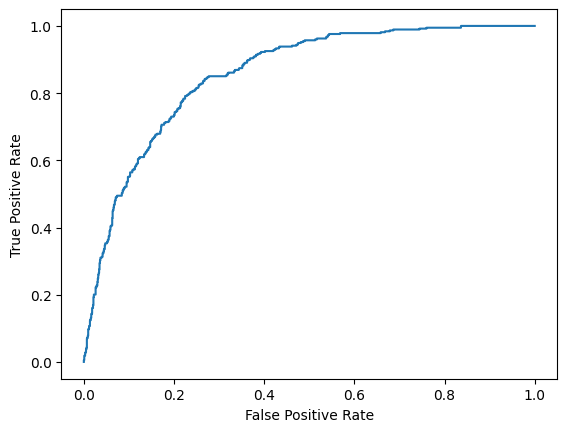

In [165]:
y_score = lr2.decision_function(x_teste)

fpr, tpr, _ = roc_curve(y_teste, y_score, pos_label=lr2.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# Decision Tree Classifier

## Sem Tunning

In [166]:
arvore = DecisionTreeClassifier()
dt = arvore.fit(x_treino, y_treino)


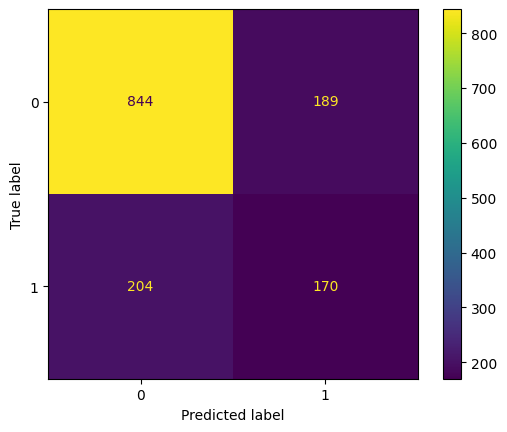

In [167]:
y_pred_dt1 = dt.predict(x_teste)

cm = confusion_matrix(y_teste, y_pred_dt1)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [168]:
metricas3 = {
    'model': ['Decision Tree Classifier', 'Decision Tree Classifier'],
    'modo': ['treino', 'teste'],
    'accuracy': [accuracy_score(y_treino, dt.predict(x_treino)), accuracy_score(y_teste, dt.predict(x_teste))],
    'balanced_accuracy': [balanced_accuracy_score(y_treino, dt.predict(x_treino)), balanced_accuracy_score(y_teste, dt.predict(x_teste))],
    'precision': [precision_score(y_treino, dt.predict(x_treino)), precision_score(y_teste, dt.predict(x_teste))],
    'recall': [recall_score(y_treino, dt.predict(x_treino)), recall_score(y_teste, dt.predict(x_teste))],
    'f1_score': [f1_score(y_treino, dt.predict(x_treino)), f1_score(y_teste, dt.predict(x_teste))],
    'rocauc': [roc_auc_score(y_treino, dt.predict_proba(x_treino)[:,1]), roc_auc_score(y_teste, dt.predict_proba(x_teste)[:,1])]

}

pd.DataFrame(metricas3)

,model,modo,accuracy,balanced_accuracy,precision,recall,f1_score,rocauc
0,Logistic Regression2,treino,0.997333,0.995197,0.999325,0.990635,0.994961,0.999981
1,Logistic Regression2,teste,0.720682,0.635792,0.473538,0.454545,0.463847,0.635868


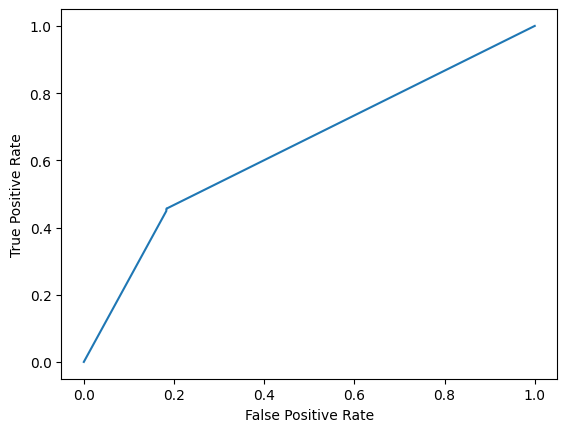

In [169]:
y_score = dt.predict_proba(x_teste)[:, 1]

fpr, tpr, _ = roc_curve(y_teste, y_score, pos_label=dt.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

## Com Tunning

In [182]:
parameters = {
    "max_depth":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

grid_search = GridSearchCV(arvore, parameters, scoring="roc_auc", cv=5, n_jobs=-1)

In [183]:
grid_search.fit(x_treino, y_treino)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='roc_auc')

In [184]:
grid_search.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [186]:
modelTree = DecisionTreeClassifier(ccp_alpha= 0.0,
 class_weight= None,
 criterion= 'gini',
 max_depth= 5,
 max_features= None,
 max_leaf_nodes= None,
 min_impurity_decrease= 0.0,
 min_samples_leaf= 1,
 min_samples_split= 2,
 min_weight_fraction_leaf= 0.0,
 random_state= None,
 splitter= 'best')

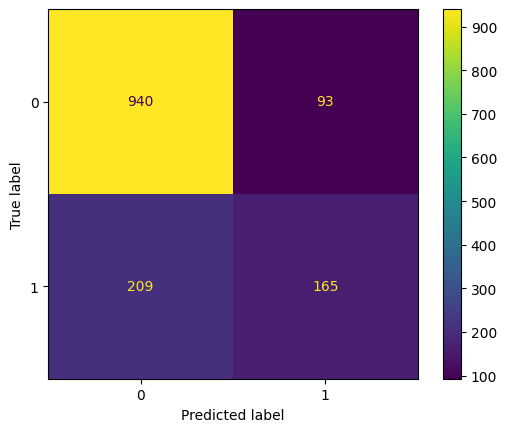

In [187]:
dt2 = modelTree.fit(x_treino, y_treino)
y_pred_dt2 = dt2.predict(x_teste)

cm = confusion_matrix(y_teste, y_pred_dt2)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [191]:
metricas4 = {
    'model': ['Decision Tree Classifier Com Tunning', 'Decision Tree Classifier Com Tunning'],
    'modo': ['treino', 'teste'],
    'accuracy': [accuracy_score(y_treino, dt2.predict(x_treino)), accuracy_score(y_teste, dt2.predict(x_teste))],
    'balanced_accuracy': [balanced_accuracy_score(y_treino, dt2.predict(x_treino)), balanced_accuracy_score(y_teste, dt2.predict(x_teste))],
    'precision': [precision_score(y_treino, dt2.predict(x_treino)), precision_score(y_teste, dt2.predict(x_teste))],
    'recall': [recall_score(y_treino, dt2.predict(x_treino)), recall_score(y_teste, dt2.predict(x_teste))],
    'f1_score': [f1_score(y_treino, dt2.predict(x_treino)), f1_score(y_teste, dt2.predict(x_teste))],
    'rocauc': [roc_auc_score(y_treino, dt2.predict_proba(x_treino)[:,1]), roc_auc_score(y_teste, dt2.predict_proba(x_teste)[:,1])]

}

pd.DataFrame(metricas4)

,model,modo,accuracy,balanced_accuracy,precision,recall,f1_score,rocauc
0,Decision Tree Classifier Com Tunning,treino,0.804978,0.701393,0.691715,0.480268,0.566917,0.852862
1,Decision Tree Classifier Com Tunning,teste,0.785359,0.675574,0.639535,0.441176,0.522152,0.832699


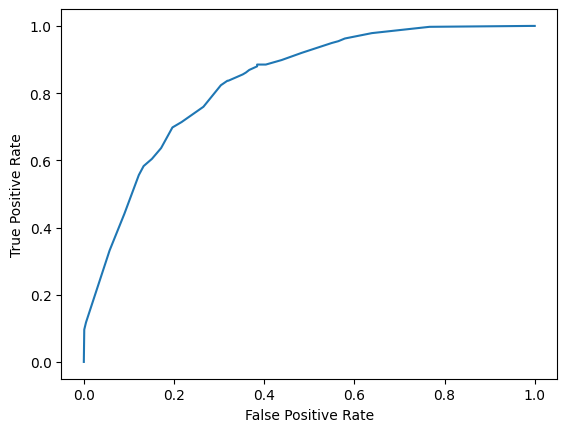

In [189]:
y_score = dt2.predict_proba(x_teste)[:, 1]

fpr, tpr, _ = roc_curve(y_teste, y_score, pos_label=dt2.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# Random Forest Classifier

## Sem Tunning

In [192]:
modelorf = RandomForestClassifier()

rf = modelorf.fit(x_treino, y_treino)


<ipython-input-192-bca31c5a3405>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = modelorf.fit(x_treino, y_treino)


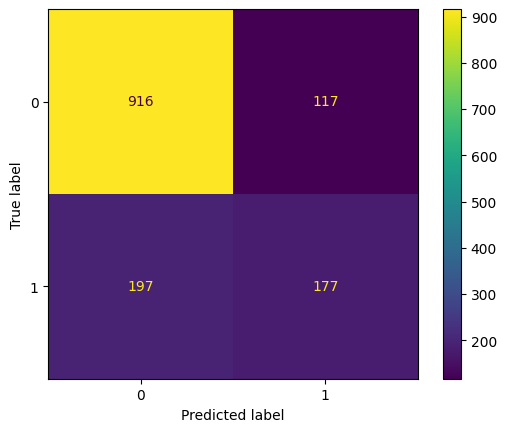

In [193]:
y_pred_rf1 = rf.predict(x_teste)

cm = confusion_matrix(y_teste, y_pred_rf1)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [195]:
metricas5 = {
    'model': ['Random Forest Classifier', 'Random Forest Classifier'],
    'modo': ['treino', 'teste'],
    'accuracy': [accuracy_score(y_treino, rf.predict(x_treino)), accuracy_score(y_teste, rf.predict(x_teste))],
    'balanced_accuracy': [balanced_accuracy_score(y_treino, rf.predict(x_treino)), balanced_accuracy_score(y_teste, rf.predict(x_teste))],
    'precision': [precision_score(y_treino, rf.predict(x_treino)), precision_score(y_teste, rf.predict(x_teste))],
    'recall': [recall_score(y_treino, rf.predict(x_treino)), recall_score(y_teste, rf.predict(x_teste))],
    'f1_score': [f1_score(y_treino, rf.predict(x_treino)), f1_score(y_teste, rf.predict(x_teste))],
    'rocauc': [roc_auc_score(y_treino, rf.predict_proba(x_treino)[:,1]), roc_auc_score(y_teste, rf.predict_proba(x_teste)[:,1])]

}

pd.DataFrame(metricas5)

,model,modo,accuracy,balanced_accuracy,precision,recall,f1_score,rocauc
0,Random Forest Classifier,treino,0.997333,0.996264,0.995979,0.993980,0.994978,0.999967
1,Random Forest Classifier,teste,0.776830,0.680000,0.602041,0.473262,0.529940,0.831870


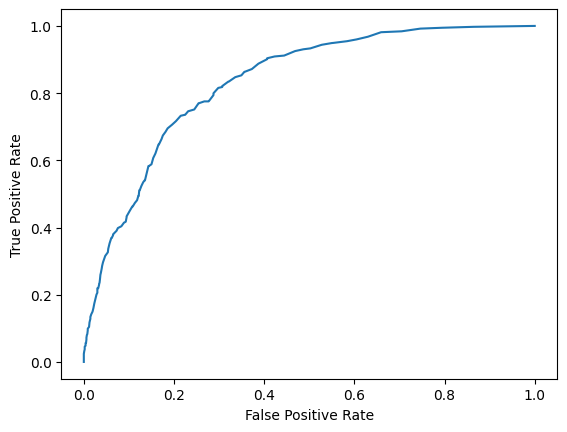

In [202]:
y_score = rf.predict_proba(x_teste)[:, 1]

fpr, tpr, _ = roc_curve(y_teste, y_score, pos_label=dt2.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

## Com Tunning

In [196]:
parameters = {
    "max_depth":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "n_estimators": [100, 300, 500]
}

grid_search = GridSearchCV(modelorf, parameters, scoring="roc_auc", cv=5, n_jobs=-1)

grid_search.fit(x_treino, y_treino)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='roc_auc')

In [197]:
grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [198]:
modelorf2 = RandomForestClassifier(bootstrap= True,
 ccp_alpha= 0.0,
 class_weight= None,
 criterion= 'gini',
 max_depth= 7,
 max_features= 'sqrt',
 max_leaf_nodes= None,
 max_samples= None,
 min_impurity_decrease= 0.0,
 min_samples_leaf= 1,
 min_samples_split= 2,
 min_weight_fraction_leaf= 0.0,
 n_estimators= 500,
 n_jobs= None,
 oob_score= False,
 random_state= None,
 verbose= 0,
 warm_start= False)

rf2 = modelorf2.fit(x_treino, y_treino)


<ipython-input-198-af2c8ddb5697>:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2 = modelorf2.fit(x_treino, y_treino)


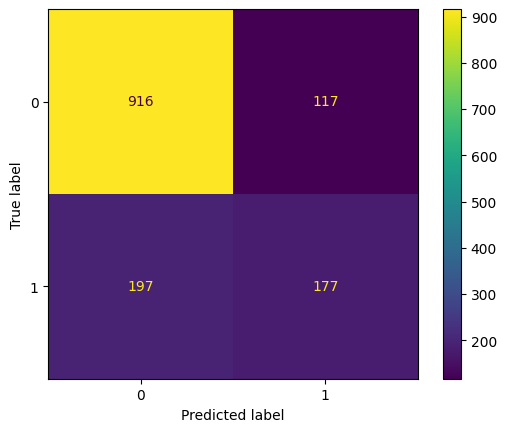

In [199]:
y_pred_rf2 = rf2.predict(x_teste)

cm = confusion_matrix(y_teste, y_pred_rf1)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [201]:
metricas6 = {
    'model': ['Random Forest Classifier Com Tunning', 'Random Forest Classifier Com Tunning'],
    'modo': ['treino', 'teste'],
    'accuracy': [accuracy_score(y_treino, rf2.predict(x_treino)), accuracy_score(y_teste, rf2.predict(x_teste))],
    'balanced_accuracy': [balanced_accuracy_score(y_treino, rf2.predict(x_treino)), balanced_accuracy_score(y_teste, rf2.predict(x_teste))],
    'precision': [precision_score(y_treino, rf2.predict(x_treino)), precision_score(y_teste, rf2.predict(x_teste))],
    'recall': [recall_score(y_treino, rf2.predict(x_treino)), recall_score(y_teste, rf2.predict(x_teste))],
    'f1_score': [f1_score(y_treino, rf2.predict(x_treino)), f1_score(y_teste, rf2.predict(x_teste))],
    'rocauc': [roc_auc_score(y_treino, rf2.predict_proba(x_treino)[:,1]), roc_auc_score(y_teste, rf2.predict_proba(x_teste)[:,1])]

}

pd.DataFrame(metricas6)

,model,modo,accuracy,balanced_accuracy,precision,recall,f1_score,rocauc
0,Random Forest Classifier Com Tunning,treino,0.819733,0.721897,0.728395,0.513043,0.602041,0.885797
1,Random Forest Classifier Com Tunning,teste,0.795309,0.686614,0.669291,0.454545,0.541401,0.852637


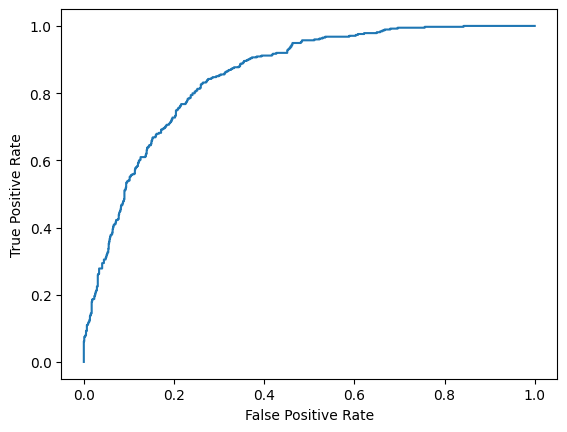

In [210]:
y_score = rf2.predict_proba(x_teste)[:, 1]

fpr, tpr, _ = roc_curve(y_teste, y_score, pos_label=dt2.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

#GradientBoostingClassifier

## Sem Tunning

In [205]:
modeloGbr = GradientBoostingClassifier()
gbr = modeloGbr.fit(x_treino, y_treino)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


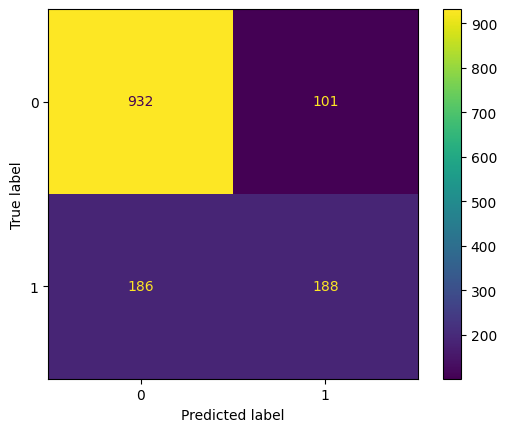

In [206]:
y_pred_gbr1 = gbr.predict(x_teste)

cm = confusion_matrix(y_teste, y_pred_gbr1)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [208]:
metricas7 = {
    'model': ['GradientBoostingClassifier', 'GradientBoostingClassifier'],
    'modo': ['treino', 'teste'],
    'accuracy': [accuracy_score(y_treino, gbr.predict(x_treino)), accuracy_score(y_teste, gbr.predict(x_teste))],
    'balanced_accuracy': [balanced_accuracy_score(y_treino, gbr.predict(x_treino)), balanced_accuracy_score(y_teste, gbr.predict(x_teste))],
    'precision': [precision_score(y_treino, gbr.predict(x_treino)), precision_score(y_teste, gbr.predict(x_teste))],
    'recall': [recall_score(y_treino, gbr.predict(x_treino)), recall_score(y_teste, gbr.predict(x_teste))],
    'f1_score': [f1_score(y_treino, gbr.predict(x_treino)), f1_score(y_teste, gbr.predict(x_teste))],
    'rocauc': [roc_auc_score(y_treino, gbr.predict_proba(x_treino)[:,1]), roc_auc_score(y_teste, gbr.predict_proba(x_teste)[:,1])]

}

pd.DataFrame(metricas7)

,model,modo,accuracy,balanced_accuracy,precision,recall,f1_score,rocauc
0,GradientBoostingClassifier,treino,0.832889,0.752834,0.734177,0.581940,0.649254,0.879645
1,GradientBoostingClassifier,teste,0.796020,0.702450,0.650519,0.502674,0.567119,0.849571


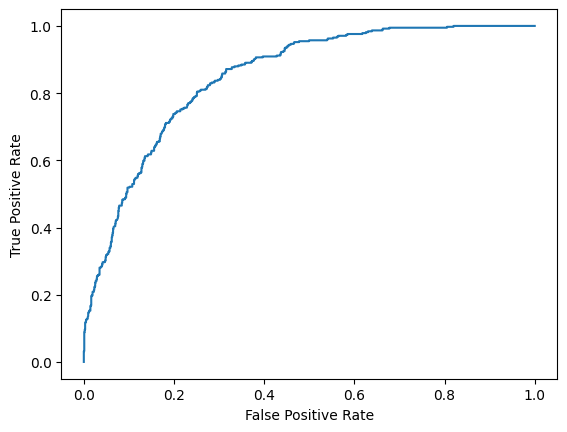

In [225]:
y_score = gbr.predict_proba(x_teste)[:, 1]

fpr, tpr, _ = roc_curve(y_teste, y_score, pos_label=gbr.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

## Com Tunning

In [213]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }
#passing the scoring function in the GridSearchCV
grid_search = GridSearchCV(GradientBoostingClassifier(), parameters,scoring="roc_auc",refit=False,cv=2, n_jobs=-1)
grid_search = grid_search.fit(x_treino, y_treino)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
84672 fits failed out of a total of 169344.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
84672 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15,
                                           0.2],
                         'loss': ['deviance'], 'max_depth': [3, 5, 8],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': array([0.1       , 0.13636364, 0.17272727, 0.20909091, 0.24545455,
       0.28181818, 0.31818182, 0.35454545, 0.39090909, 0.42727273,
       0.46363636, 0.5       ]),
                         'min_samples_split': array([0.1       , 0.13636364, 0.17272727, 0.20909091, 0.24545455,
       0.28181818, 0.31818182, 0.35454545, 0.39090909, 0.42727273,
       0.46363636, 0.5       ]),
                         'n_estimators': [10],
                         'subsample': [0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0]},
             refit=False, scoring='roc_auc')

In [217]:
grid_search = grid_search.fit(x_treino, y_treino)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
84672 fits failed out of a total of 169344.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
84672 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn

In [221]:
grid_search.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.2,
 'loss': 'deviance',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.17272727272727273,
 'n_estimators': 10,
 'subsample': 1.0}

In [222]:
modeloGbr2 = GradientBoostingClassifier(criterion= 'friedman_mse',
 learning_rate= 0.2,
 loss= 'deviance',
 max_depth= 5,
 max_features= 'log2',
 min_samples_leaf= 0.1,
 min_samples_split= 0.17272727272727273,
 n_estimators= 10,
 subsample= 1.0)
gbr2 = modeloGbr.fit(x_treino, y_treino)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


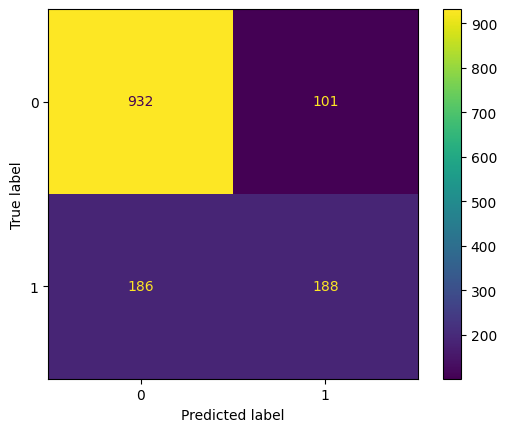

In [223]:
y_pred_gbr2 = gbr2.predict(x_teste)

cm = confusion_matrix(y_teste, y_pred_gbr1)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [224]:
metricas8 = {
    'model': ['GradientBoostingClassifier Com Tunning', 'GradientBoostingClassifier Com Tunning'],
    'modo': ['treino', 'teste'],
    'accuracy': [accuracy_score(y_treino, gbr2.predict(x_treino)), accuracy_score(y_teste, gbr2.predict(x_teste))],
    'balanced_accuracy': [balanced_accuracy_score(y_treino, gbr2.predict(x_treino)), balanced_accuracy_score(y_teste, gbr2.predict(x_teste))],
    'precision': [precision_score(y_treino, gbr2.predict(x_treino)), precision_score(y_teste, gbr2.predict(x_teste))],
    'recall': [recall_score(y_treino, gbr2.predict(x_treino)), recall_score(y_teste, gbr2.predict(x_teste))],
    'f1_score': [f1_score(y_treino, gbr2.predict(x_treino)), f1_score(y_teste, gbr2.predict(x_teste))],
    'rocauc': [roc_auc_score(y_treino, gbr2.predict_proba(x_treino)[:,1]), roc_auc_score(y_teste, gbr2.predict_proba(x_teste)[:,1])]

}

pd.DataFrame(metricas8)

,model,modo,accuracy,balanced_accuracy,precision,recall,f1_score,rocauc
0,GradientBoostingClassifier Com Tunning,treino,0.832889,0.752834,0.734177,0.581940,0.649254,0.879645
1,GradientBoostingClassifier Com Tunning,teste,0.797441,0.704271,0.653979,0.505348,0.570136,0.849892


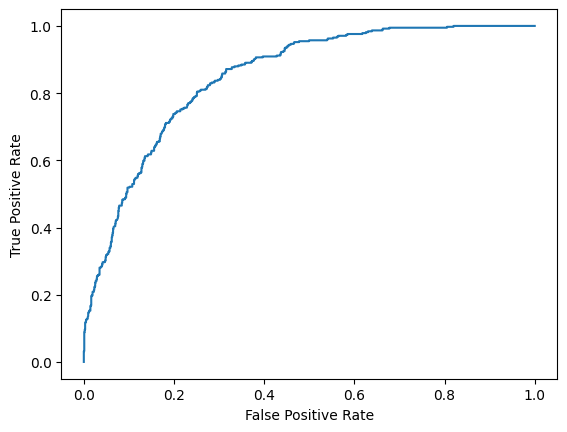

In [227]:
y_score = gbr2.predict_proba(x_teste)[:, 1]

fpr, tpr, _ = roc_curve(y_teste, y_score, pos_label=gbr2.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()